# House Prices: Advanced Regression Techniques

###### May ~ June, 2020

###### features
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict. <br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: $Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold <br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>

### 1. Load Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py 
import statsmodels.api as sm 

from scipy.stats import stats
from scipy.stats import skew, norm, probplot, boxcox

In [5]:
train = pd.read_csv('House Price Prediction/train.csv')
test = pd.read_csv('House Price Prediction/test.csv')
train.shape, test.shape

FileNotFoundError: [Errno 2] File b'House Price Prediction/train.csv' does not exist: b'House Price Prediction/train.csv'

In [3]:
train_id = train['Id']
test_id = test['Id']

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.drop("Id", axis = 1, inplace = True)

### 2. Data Exploration

In [2]:
skewness = train.skew()
kurtosis = train.kurt()
corr = train.corr().SalePrice
table1 = pd.DataFrame({'skeness': skewness, 'kurtosis': kurtosis, 'correlation': corr})
table1.sort_values(ascending=False, by = ['correlation'])

NameError: name 'train' is not defined

'OverallQual' has the highest correlation to 'SalePrice' and it makes perfect sense.<br>
Let's visualize some of the variables that are highly correlated to 'SalePrice'.

In [7]:
# get col names of those having corr larger than 0.5 or less than -0.5
columns = table1[table1.correlation > 0.5].index
columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

We will investigate these features: <br>
 'OverallQual', : Overall Quality <br>
 'TotalBsmtSF', : Total square feet of basement area <br>
 '1stFlrSF',    : First Floor square feet <br>
 'GrLivArea',   : Above grade (ground) living area square feet <br>
 'TotRmsAbvGrd',: Total rooms above grade <br>
 'GarageCars',  : Size of garage in car capacity <br>
 'GarageArea',  : Size of garage in square feet <br>
 'SalePrice',   : Sale price in dollars <br>

In [8]:
# The selected columns
columns = list(columns[[0,3,4,5, 7,8,9,10]])
columns

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

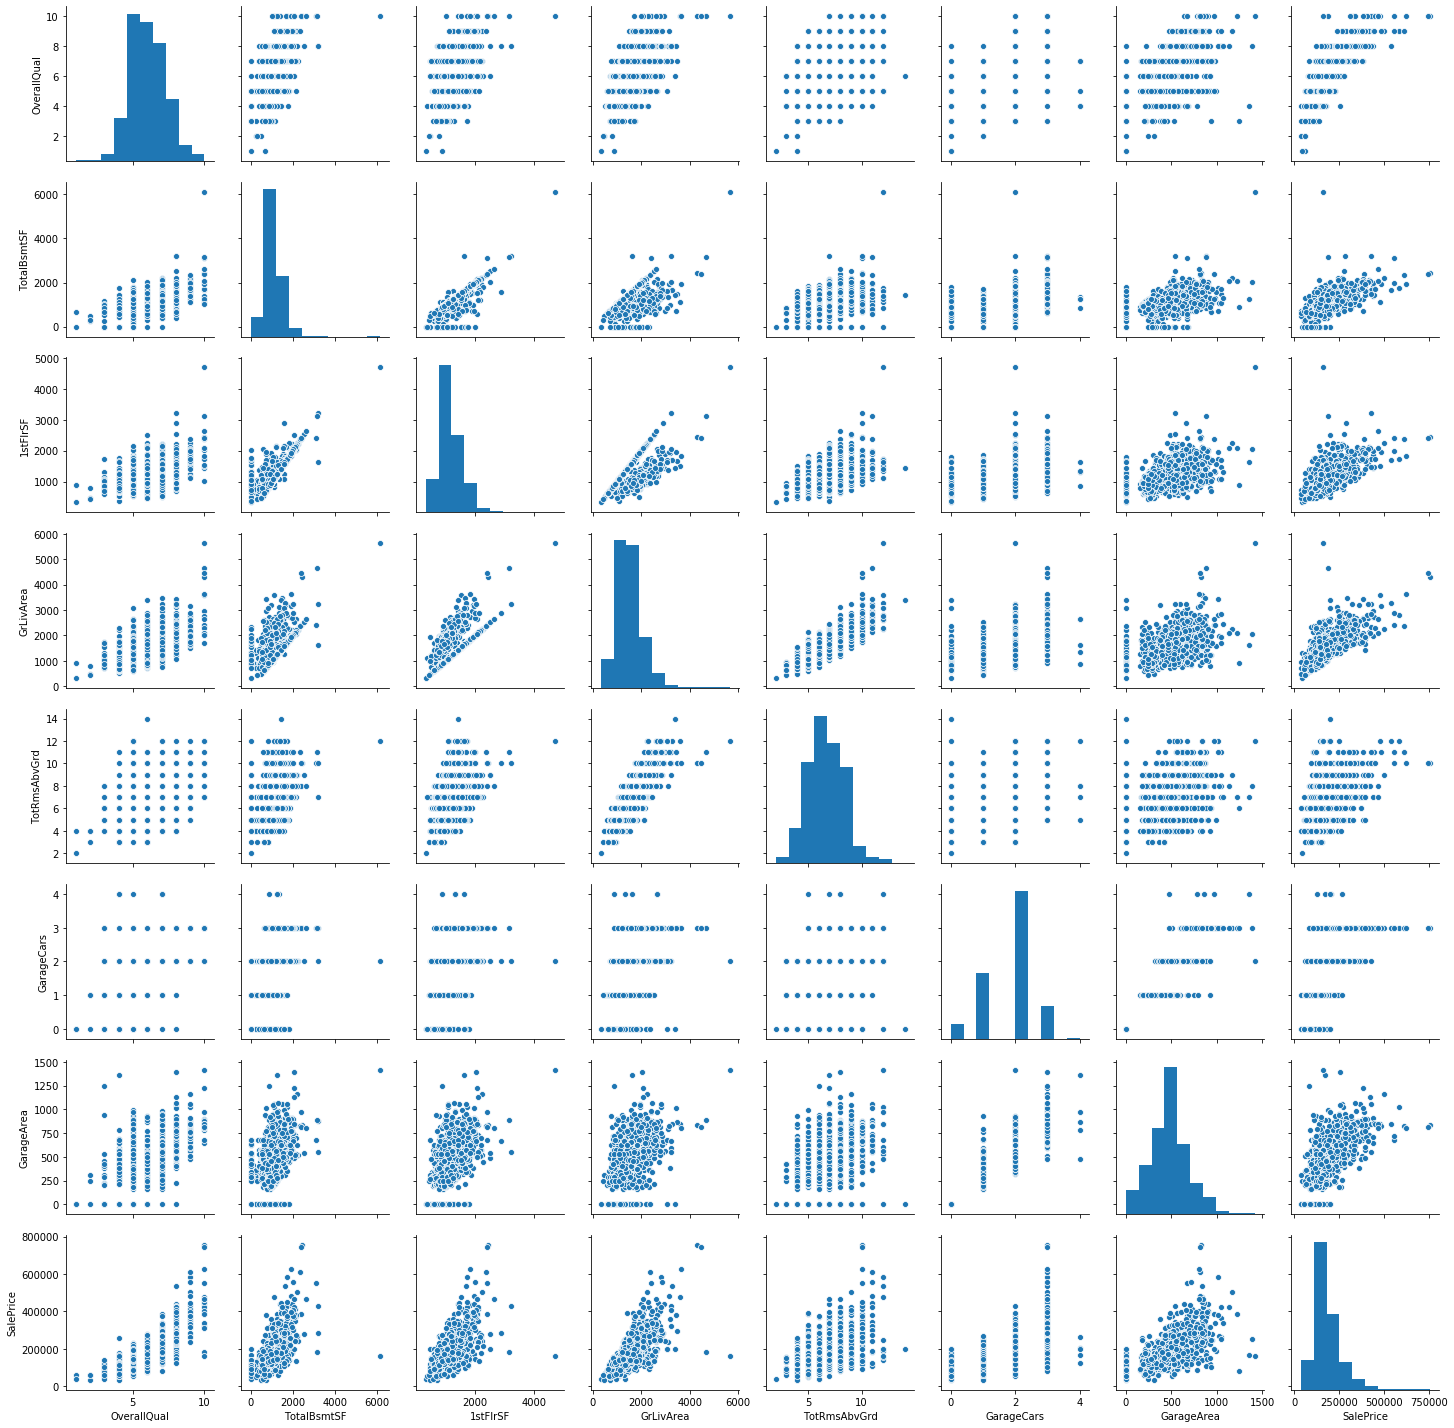

In [9]:
# pairplots of selected columns  
sns.pairplot(train[columns])

Re-plot(better plots) the continuous variables related to 'SalePrice'.

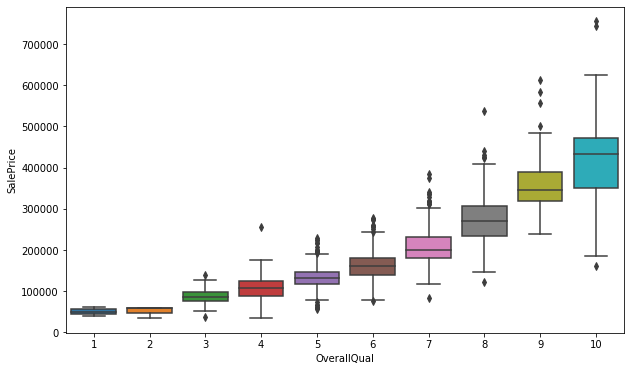

In [10]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

###### the distribution plot and qqplot of response variable

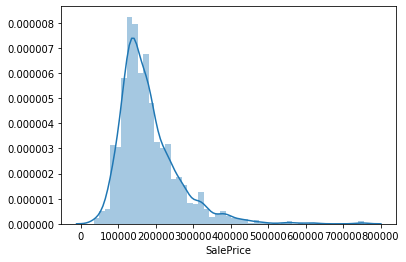

In [11]:
# distribution plot and qqplot of SalePrice BEFORE log transformation
sns.distplot(train.SalePrice)

The plot shows 'SalePrice' distribution is skewed to the right

In [12]:
skew(train.SalePrice)

1.880940746034036

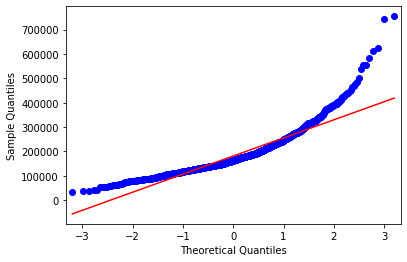

In [13]:
sm.qqplot(train.SalePrice, line = 'r')
plt.show()

From the first graph above we can see that Sales Price distribution is skewed, has a peak, it deviates from normal distribution and is positively biased. From the Probability Plot, we could see that Sales Price also does not align with the diagonal red line which represent normal distribution. The form of its distribution confirm that is a skewed right.

With skewness positive of 1.9, we confirm the lack of symmetry and indicate that Sales Price are skewed right, as we can see too at the Sales Distribution plot, skewed right means that the right tail is long relative to the left tail. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers, and positive kurtosis indicates a heavy-tailed distribution and negative kurtosis indicates a light tailed distribution. So, with 6.5 of positive kurtosis Sales Price are definitely heavy-tailed and has some outliers that we need take care.

Note that in contrast to common belief, training a linear regression model does not require that the explanatory or target variables are normally distributed. The normality assumption is only a requirement for certain statistical tests and hypothesis tests.

So, I try some linear regressors with both, with and without transformation of SalePrice to check their results.

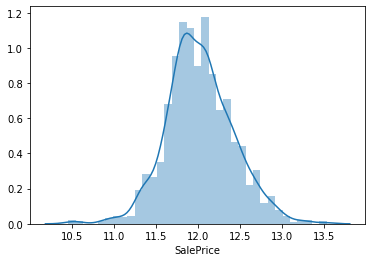

In [14]:
# distribution plot and qqplot of SalePrice AFTER log transformation
sns.distplot(np.log1p(train.SalePrice))

In [15]:
skew(np.log1p(train.SalePrice))

0.12122191311528363

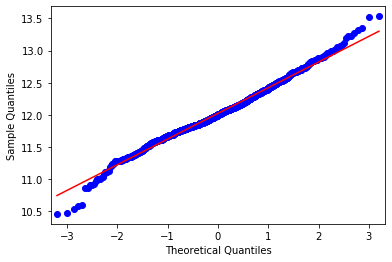

In [16]:
sm.qqplot(np.log1p(train.SalePrice), line = 'r') 
plt.show()

###### Plots of Other variables

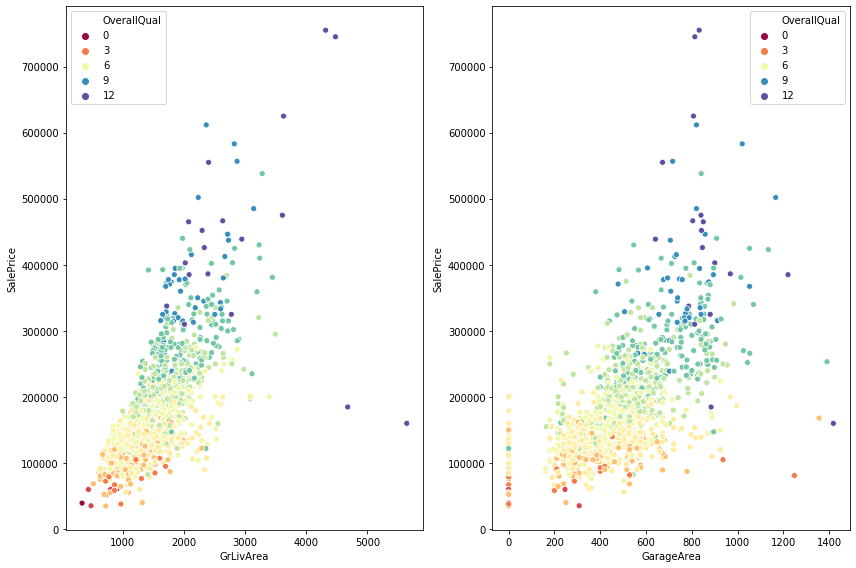

In [17]:
fig = plt.figure(figsize=(12,8))
# sns.set(font_scale=1.5)
fig1 = fig.add_subplot(121); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')
fig2 = fig.add_subplot(122); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

plt.tight_layout(); plt.show()

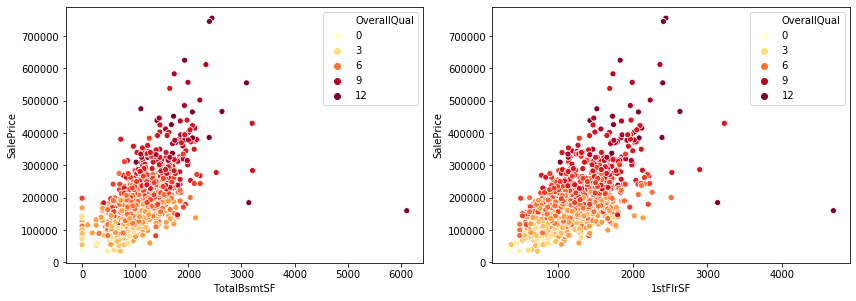

In [18]:
fig2 = plt.figure(figsize=(12, 8))
fig4 = fig2.add_subplot(221); 
sns.scatterplot(x = train.TotalBsmtSF, y = train.SalePrice, hue=train.OverallQual, palette= 'YlOrRd')
fig5 = fig2.add_subplot(222); 
sns.scatterplot(x = train['1stFlrSF'], y = train.SalePrice, hue=train.OverallQual, palette= 'YlOrRd')

plt.tight_layout()
plt.show()

In [19]:
#plt.plot(train.GrLivArea, train.SalePrice, 'o')
#m, b = np.polyfit(train.GrLivArea, train.SalePrice, 1)
#plt.plot(train.GrLivArea, m*train.GrLivArea + b, color = 'red')

Regression plots

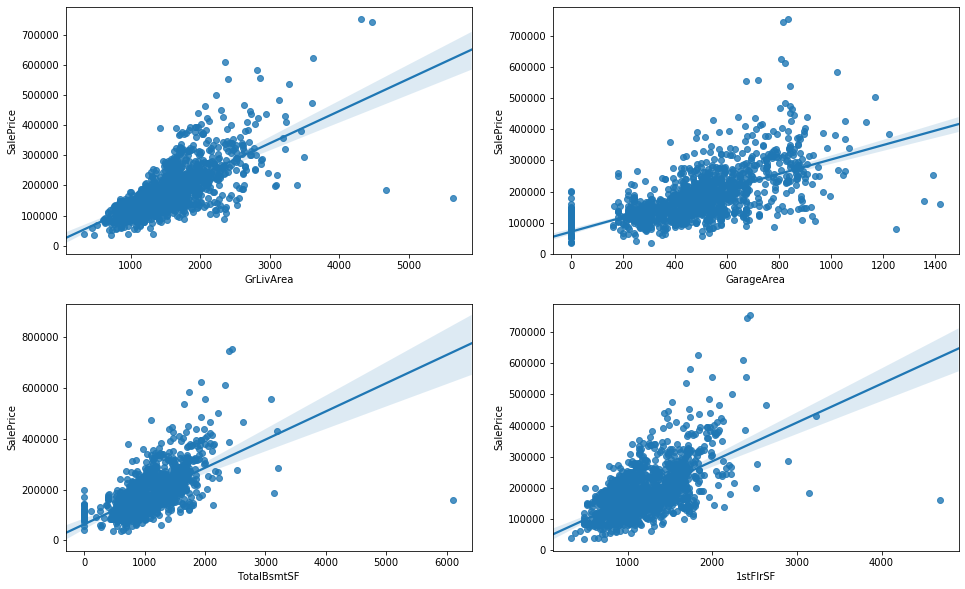

In [20]:
# regression plots of 4 area variables
fig = plt.figure(figsize = (16, 10))
fig.add_subplot(221);sns.regplot(x='GrLivArea', y='SalePrice', data=train); 
fig.add_subplot(222);sns.regplot(x='GarageArea', y='SalePrice', data=train); 
fig.add_subplot(223);sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train);
fig.add_subplot(224);sns.regplot(x='1stFlrSF', y='SalePrice', data=train);

###### Garage

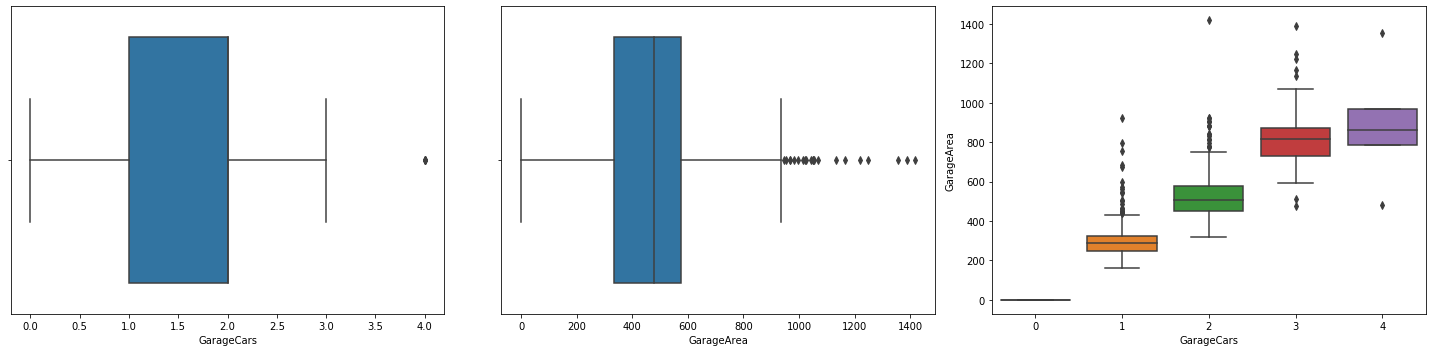

In [21]:
# boxplot
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.boxplot(train.GarageCars)
fig2 = fig.add_subplot(132); sns.boxplot(train.GarageArea)
fig3 = fig.add_subplot(133); sns.boxplot(train.GarageCars, train.GarageArea)

plt.tight_layout()
plt.show()

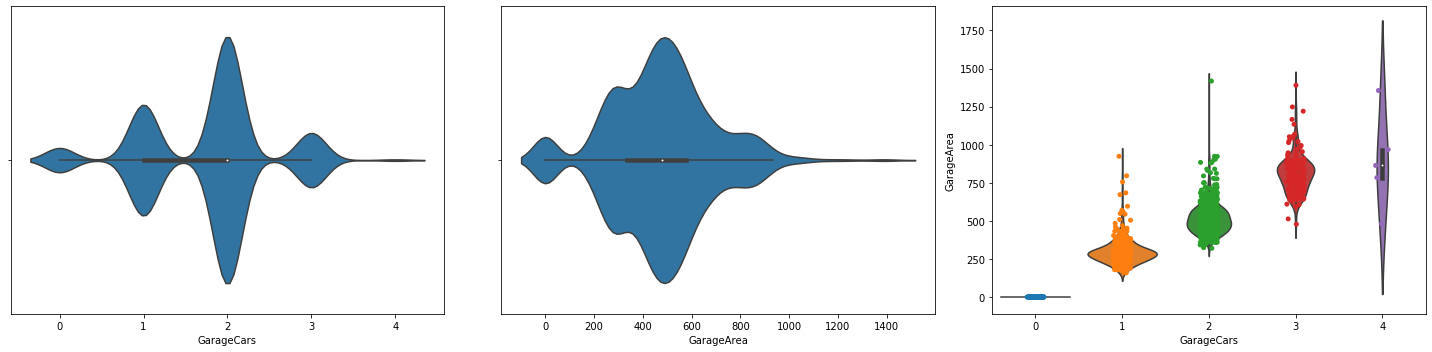

In [22]:
# violin plot
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.violinplot(train.GarageCars)
fig2 = fig.add_subplot(132); sns.violinplot(train.GarageArea)
fig3 = fig.add_subplot(133); sns.violinplot(train.GarageCars, train.GarageArea)
sns.stripplot(train.GarageCars, train.GarageArea, data=train, jitter=True, edgecolor="gray")

plt.tight_layout()
plt.show()

C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Outliers: 4


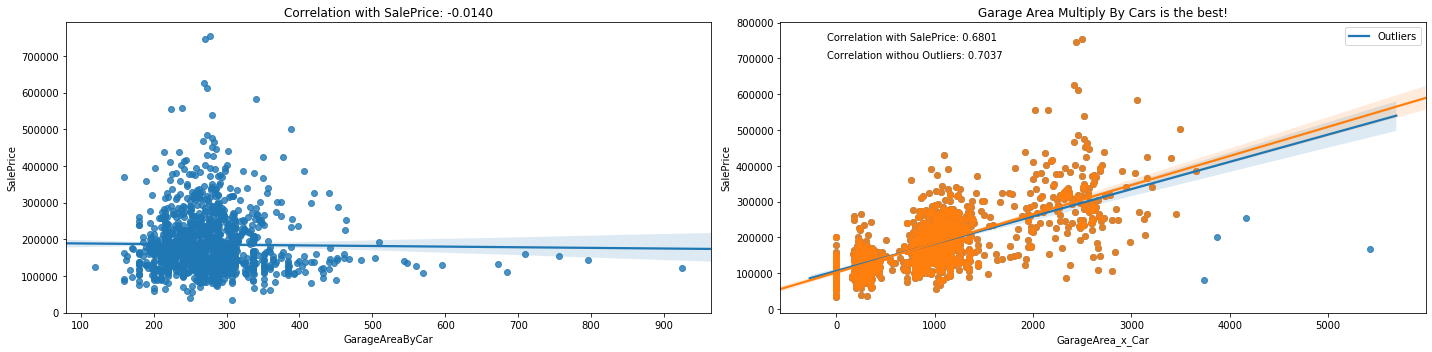

In [23]:
# detect outliers
tmp_df = train[['SalePrice', 'GarageArea', 'GarageCars']]
tmp_df['GarageAreaByCar'] = train.GarageArea/train.GarageCars
tmp_df['GarageArea_x_Car'] = train.GarageArea*train.GarageCars

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GarageAreaByCar', y='SalePrice', data=tmp_df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(tmp_df.GarageAreaByCar.corr(tmp_df.SalePrice)))

fig2 = fig.add_subplot(122); sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=tmp_df)
plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(tmp_df.GarageArea_x_Car.corr(tmp_df.SalePrice)))

print('Outliers:',(tmp_df.GarageArea_x_Car>=3700).sum())

tmp_df = tmp_df[tmp_df.GarageArea_x_Car<3700]
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=tmp_df);
plt.title('Garage Area Multiply By Cars is the best!')
plt.text(x=-100, y=700000, s='Correlation withou Outliers: {:6.4f}'.format(tmp_df.GarageArea_x_Car.corr(tmp_df.SalePrice)))

plt.tight_layout()
plt.show()
del tmp_df

In [24]:
train = train[train.GarageArea * train.GarageCars < 3700]
print('Total observatiosn after outliers cut:', train.shape[0])

Total observatiosn after outliers cut: 1456


total Basement Area Vs 1st Flor Area

C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Outliers: 3


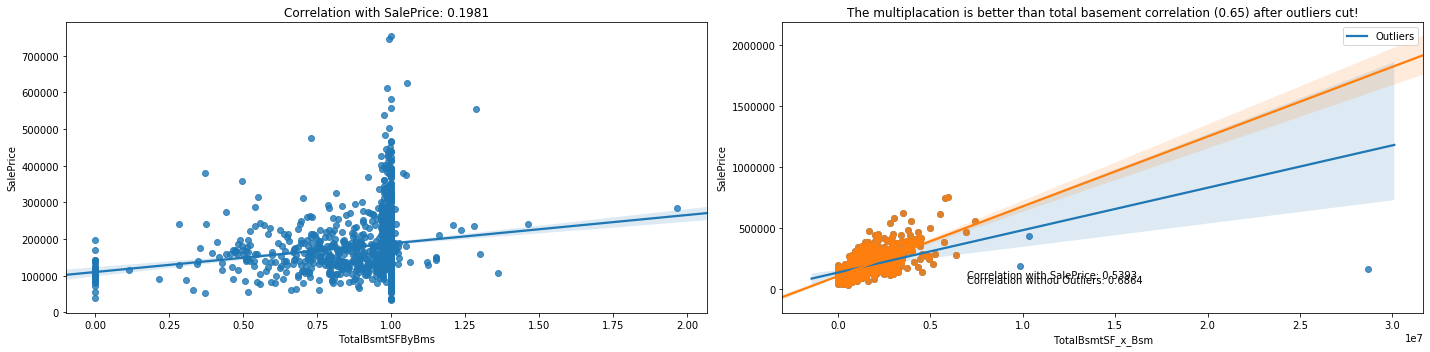

In [25]:
tmp_df = train[['SalePrice', 'TotalBsmtSF', '1stFlrSF']]
tmp_df['TotalBsmtSFByBms'] = train.TotalBsmtSF/train['1stFlrSF']
tmp_df['TotalBsmtSF_x_Bsm'] = train.TotalBsmtSF*train['1stFlrSF']

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='TotalBsmtSFByBms', y='SalePrice', data=tmp_df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(tmp_df.TotalBsmtSFByBms.corr(tmp_df.SalePrice)))

fig2 = fig.add_subplot(122); sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=tmp_df)
plt.legend(['Outliers'])
plt.text(x=7e06, y=90000, s='Correlation with SalePrice: {:1.4f}'.format(tmp_df.TotalBsmtSF_x_Bsm.corr(tmp_df.SalePrice)))

print('Outliers:',(tmp_df.TotalBsmtSF_x_Bsm>=0.9e07).sum())

tmp_df = tmp_df[tmp_df.TotalBsmtSF_x_Bsm<0.9e07]
sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=tmp_df); 
plt.title('The multiplacation is better than total basement correlation ({:1.2f}) after outliers cut!'\
          .format(tmp_df.TotalBsmtSF.corr(tmp_df.SalePrice)))
plt.text(x=7e06, y=50000, s='Correlation withou Outliers: {:1.4f}'.format(tmp_df.TotalBsmtSF_x_Bsm.corr(tmp_df.SalePrice)))

plt.tight_layout()
plt.show()
del tmp_df

### 3. Treat missing values

In [26]:
# combine train and test
combined = [train, test]
df = pd.concat(combined, sort=False, ignore_index=True)
df.drop('Id', axis=1, inplace=True)
df.shape

(2915, 80)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 80 columns):
MSSubClass       2915 non-null int64
MSZoning         2911 non-null object
LotFrontage      2430 non-null float64
LotArea          2915 non-null int64
Street           2915 non-null object
Alley            198 non-null object
LotShape         2915 non-null object
LandContour      2915 non-null object
Utilities        2913 non-null object
LotConfig        2915 non-null object
LandSlope        2915 non-null object
Neighborhood     2915 non-null object
Condition1       2915 non-null object
Condition2       2915 non-null object
BldgType         2915 non-null object
HouseStyle       2915 non-null object
OverallQual      2915 non-null int64
OverallCond      2915 non-null int64
YearBuilt        2915 non-null int64
YearRemodAdd     2915 non-null int64
RoofStyle        2915 non-null object
RoofMatl         2915 non-null object
Exterior1st      2914 non-null object
Exterior2nd      2914 non

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2915.0,57.102916,42.462625,20.0,20.0,50.0,70.00,190.0
LotFrontage,2430.0,69.264198,23.325205,21.0,59.0,68.0,80.00,313.0
LotArea,2915.0,10156.403087,7880.062289,1300.0,7474.0,9450.0,11554.50,215245.0
OverallQual,2915.0,6.090566,1.408632,1.0,5.0,6.0,7.00,10.0
OverallCond,2915.0,5.566038,1.113041,1.0,5.0,5.0,6.00,9.0
YearBuilt,2915.0,1971.316981,30.296505,1872.0,1953.5,1973.0,2001.00,2010.0
YearRemodAdd,2915.0,1984.276158,20.891397,1950.0,1965.0,1993.0,2004.00,2010.0
MasVnrArea,2892.0,102.058091,179.337885,0.0,0.0,0.0,164.00,1600.0
BsmtFinSF1,2914.0,441.459849,455.581539,0.0,0.0,368.5,733.00,5644.0
BsmtFinSF2,2914.0,49.650309,169.311762,0.0,0.0,0.0,0.00,1526.0


In [29]:
# last row from train and 1st from test
df.SalePrice[1459], df.SalePrice[1460]

(nan, nan)

In [30]:
missCol = df.isnull().sum(0)[df.isnull().sum(0) != 0]
missCol, print('\n There are',sum(missCol),'missing values in',len(missCol),'columns.',\
               round(sum(missCol)/(df.shape[0]*(df.shape[1]-1))*100, 2), '% of all data')


 There are 15406 missing values in 35 columns. 6.69 % of all data


(MSZoning           4
 LotFrontage      485
 Alley           2717
 Utilities          2
 Exterior1st        1
 Exterior2nd        1
 MasVnrType        24
 MasVnrArea        23
 BsmtQual          81
 BsmtCond          82
 BsmtExposure      82
 BsmtFinType1      79
 BsmtFinSF1         1
 BsmtFinType2      80
 BsmtFinSF2         1
 BsmtUnfSF          1
 TotalBsmtSF        1
 Electrical         1
 BsmtFullBath       2
 BsmtHalfBath       2
 KitchenQual        1
 Functional         2
 FireplaceQu     1418
 GarageType       157
 GarageYrBlt      159
 GarageFinish     159
 GarageCars         1
 GarageArea         1
 GarageQual       159
 GarageCond       159
 PoolQC          2905
 Fence           2344
 MiscFeature     2811
 SaleType           1
 SalePrice       1459
 dtype: int64, None)

plots of missing values

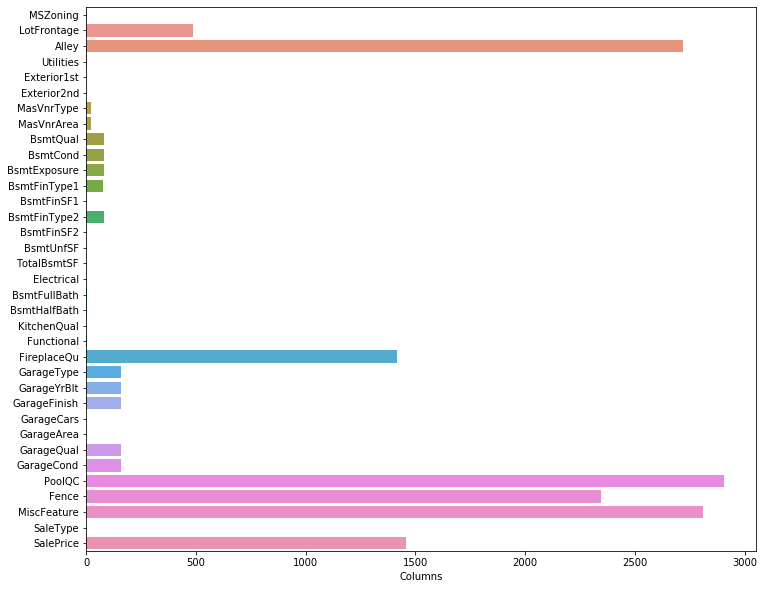

In [31]:
# sideway barplot of missing values in train
fig = plt.figure(figsize=(12,10))
missCol_df = pd.DataFrame(missCol, columns = ['Columns'])
sns.barplot(x = 'Columns', y=missCol_df.index, data=missCol_df)
plt.show()

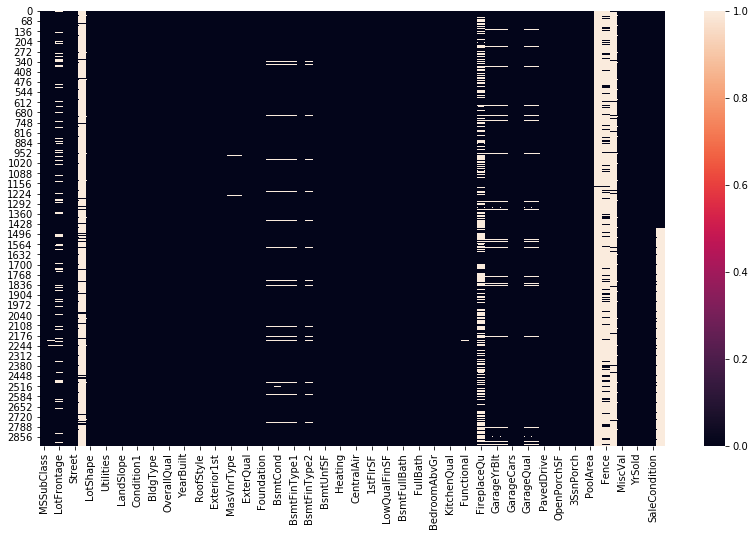

In [32]:
# a heatmap of missing values
fig = plt.figure(figsize=(14,8))
sns.heatmap(df.isnull())
plt.show()

The total training observations are 1,460 and have 80 features with 19 columns with nulls.
Combined data including both train and test sets have 2919 rows and 80 features, and 6.01% are null values spreadout in 35 features. According to feature description from by Kaggle, NA in some features mean absence.

14 has few null, so are good candidates for imputer strategies:
GarageFinish 1379 object. Interior finish of the garage.
GarageQual 1379 object: Garage quality.
GarageCond 1379 object: Garage condition.
GarageType 1379 object: Garage location
GarageYrBlt 1379 float64: Year garage was built
Electrical 1459 object. Only one, can apply the most common.
MasVnrType 1452 object: is the masonry veneer type, hasn't CBlock!
MasVnrArea 1452 float64: Masonry veneer area in square feet.
BsmtExposure 1422 object: Refers to walkout or garden level walls.
BsmtFinType2 1422 object: Rating of basement finished area (if multiple types).
BsmtQual 1423 object: Evaluates the height of the basement Doesn't have PO.
BsmtCond 1423 object: Evaluates the general condition of the basement.
BsmtFinType1 1423 object: Rating of basement finished area (if multiple types).
LotFrontage 1201 float64: is the linear feet of street connected to property.

5 has miss ration grater than 47%, maybe candidates to exclude, especially if their have below correlation with price.
Fence 281 object: Fence quality.
FireplaceQu 770 object: Fireplace quality.
MiscFeature 54 object: Miscellaneous feature not covered in other categories.
Alley 91 object: is the type of alley access to property.
PoolQC 7 object: Pool quality. Attention for the related other feature PoolArea: Pool area in square feet
Some numeric data are ordinal or categorical already translate to codes. We need correct identify the ordinal from the description and can maintain as is, but need to change categorical.

Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modeling. We can then safely remove it.

In [33]:
uniques = df.apply(lambda x: [x.unique()])
unique_counts = df.apply(lambda x: len(x.unique()))
types = df.dtypes
#skewness = df.skew()
#kurtosis = df.kurt()
#corr = df.corr()
table2 = pd.concat({'type':types,'unique values':uniques, 'uniques count': unique_counts,\
                   'na count': df.isnull().sum(0)}, axis = 1, sort=False)

table of features that have missing values

In [34]:
table2[table2['na count'] != 0]

,na count,type,unique values,uniques count
MSZoning,4,object,"[[RL, RM, C (all), FV, RH, nan]]",6
LotFrontage,485,float64,"[[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, na...",129
Alley,2717,object,"[[nan, Grvl, Pave]]",3
Utilities,2,object,"[[AllPub, NoSeWa, nan]]",3
Exterior1st,1,object,"[[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace,...",16
Exterior2nd,1,object,"[[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood,...",17
MasVnrType,24,object,"[[BrkFace, None, Stone, BrkCmn, nan]]",5
MasVnrArea,23,float64,"[[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286....",445
BsmtQual,81,object,"[[Gd, TA, Ex, nan, Fa]]",5
BsmtCond,82,object,"[[TA, Gd, nan, Fa, Po]]",5


###### table of features that has more than 1000 missing values

In [36]:
table2[table2.type == object][table2['na count'] > 1000]

C:\Users\ytjya\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,na count,type,unique values,uniques count
Alley,2717,object,"[[nan, Grvl, Pave]]",3
FireplaceQu,1418,object,"[[nan, TA, Gd, Fa, Ex, Po]]",6
PoolQC,2905,object,"[[nan, Ex, Fa, Gd]]",4
Fence,2344,object,"[[nan, MnPrv, GdWo, GdPrv, MnWw]]",5
MiscFeature,2811,object,"[[nan, Shed, Gar2, Othr, TenC]]",5


#### Drop features that have too many missing values unless correlation to SalePrice is high

review the correlation to SalePrice from train set.

In [37]:
len(train.corr().SalePrice.sort_values(ascending=False)), train.shape[1]

(37, 80)

In [38]:
train.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.791505
GrLivArea        0.708954
GarageCars       0.646387
GarageArea       0.636403
TotalBsmtSF      0.613530
1stFlrSF         0.605922
FullBath         0.560165
TotRmsAbvGrd     0.535094
YearBuilt        0.522068
YearRemodAdd     0.506296
GarageYrBlt      0.487046
MasVnrArea       0.477105
Fireplaces       0.466762
BsmtFinSF1       0.387254
LotFrontage      0.354113
WoodDeckSF       0.325980
2ndFlrSF         0.319698
OpenPorchSF      0.315579
HalfBath         0.283580
LotArea          0.265304
BsmtFullBath     0.227359
BsmtUnfSF        0.213985
BedroomAbvGr     0.167643
ScreenPorch      0.111503
PoolArea         0.092471
MoSold           0.046423
3SsnPorch        0.044601
BsmtFinSF2      -0.011443
BsmtHalfBath    -0.017689
MiscVal         -0.020258
LowQualFinSF    -0.025651
YrSold          -0.029620
OverallCond     -0.079018
MSSubClass      -0.084476
EnclosedPorch   -0.128777
KitchenAbvGr    -0.137703
Name: SalePrice, dtype: float64

###### Alley

In [39]:
df.Alley.value_counts(), df.Alley.isnull().sum()

(Grvl    120
 Pave     78
 Name: Alley, dtype: int64, 2717)

2717 missing values should mean 2717 of the observations do not have a alleyaccess, so na will be replaced 0.

###### Fireplaces

In [40]:
df.Fireplaces.value_counts()

0    1418
1    1266
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

In [41]:
df.FireplaceQu.value_counts()

Gd    743
TA    591
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

1418 don't have a fireplace and the 1418 missing values for FireplaceQu means absence.
At this missing value treatment step, nan will be replaced by 0 which aligns with categorical feature conversion strategy. The feature will be kept at this step.

###### Pool, Fence, MiscFeatures

PoolArea has a low correlation(0.092471) to SalePrice, and correlation of SalePrices to Fence and MiscFeature are not found fow now.<br>
nan in these features indicate absence so nan will be replaced by 0. <br>
In the first attempt of analysis, the strategy is dropping these 3 features.<br>
<br>
The features will be kept in the next attempt because there is an assumption that these features have an impact on SalePrice. The 2nd attempt will show if it improves the model.

In [42]:
# features to drop in the future because many missing values
feat_to_drop = ['Alley', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(feat_to_drop, axis=1, inplace=True)

###### Street, Utilities

Street and Utilities have frequency concentrated in one category. 
Make a decisoin to drop these two features.

In [45]:
# more features to drop 
df.drop(['Street', 'Utilities'], axis=1, inplace=True)

#### Impute Missing Values 

###### Lot Frontage 

Other Lot features do not have missing values. Missing values in lot frontage will be imputed. 

In [64]:
# Group by Neigborhood and fill missing value with Lot frontage median of the respect Neigborhood
neighborMean = df.groupby('Neighborhood').LotFrontage.mean()
neighborMean

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
IDOTRR     61.569767
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.168449
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.098765
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: LotFrontage, dtype: float64

In [68]:
df[['Neighborhood', 'LotFrontage']].transpose()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,2914
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,MeadowV,MeadowV,Mitchel,MeadowV,MeadowV,MeadowV,MeadowV,Mitchel,Mitchel,Mitchel
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,...,21,21,80,21,21,21,21,160,62,74


In [87]:
neighborMean[]

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    66.910112
Gilbert    74.207207
IDOTRR     61.569767
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.168449
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.098765
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.157895
Veenker    72.000000
Name: LotFrontage, dtype: float64

In [79]:
df[['Neighborhood', 'LotFrontage']].apply(lambda x: neighborMean[x.Neighborhood]\
                                          if np.isnan(x.LotFrontage) else x.LotFrontage, axis=1)

0        65.000000
1        80.000000
2        68.000000
3        60.000000
4        84.000000
5        85.000000
6        75.000000
7        81.517647
8        51.000000
9        50.000000
10       70.000000
11       85.000000
12       74.551020
13       91.000000
14       75.168449
15       51.000000
16       75.168449
17       72.000000
18       66.000000
19       70.000000
20      101.000000
21       57.000000
22       75.000000
23       44.000000
24       74.551020
25      110.000000
26       60.000000
27       98.000000
28       47.000000
29       60.000000
           ...    
2885     50.000000
2886     75.000000
2887     69.000000
2888     50.000000
2889     60.000000
2890     41.000000
2891     44.000000
2892     69.000000
2893     65.000000
2894     70.000000
2895    140.000000
2896     81.157895
2897     81.157895
2898     95.000000
2899     88.000000
2900    125.000000
2901     78.000000
2902     41.000000
2903     58.000000
2904     75.144444
2905     21.000000
2906     21.

###### Mason features

In [1]:
df.MasVnrType.value_counts(), df.MasVnrType.isnull().sum()

NameError: name 'df' is not defined

nan in MasVnrType is not absence. The missing value MasVnrArea are also not indication of absence. 
These missing values will be imputed. 

In [ ]:
feat = ['MasVnrArea', 'MasVnrType']
c = all_data[~all_data.MasVnrArea.isnull()][feat]
print('Masonry veneer Nulls:')
print(all_data[feat].isnull().sum(), '\n')
print("Has MasVnrType but not has MasVnrArea:",all_data[~all_data.MasVnrType.isnull()].MasVnrArea.isnull().sum())
print("Has MasVnrArea but not has MasVnrType:",c[c.MasVnrType.isnull()].MasVnrArea.count())
print(c[c.MasVnrType.isnull()], '\n')

print("Has MasVnrType but MasVnrArea is equal a Zero:",c[c.MasVnrArea==0].MasVnrType.count())
print("MasVnrArea equal a 0: ", (all_data.MasVnrArea==0).sum(), '\n')
print("Has Type and Area == 0:")
print(c[c.MasVnrArea==0].MasVnrType.value_counts(), '\n')

print("Type None with Area > 0 ?")
print(all_data.loc[(all_data.MasVnrType=='None') & (all_data.MasVnrArea>0), ['MasVnrType','MasVnrArea']])

print('\n What is the most comumn MasVnrType after None?')
print(all_data.MasVnrType.value_counts())

###### Basement Features

In [ ]:
feat = ['BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath', 
        'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
print(all_data[feat].isnull().sum())
print("BsmtFinSF1 equal a 0: ", (all_data.BsmtFinSF1==0).sum())
print("BsmtFinSF2 equal a 0: ", (all_data.BsmtFinSF2==0).sum())
print("BsmtUnfSF equal a 0: ", (all_data.BsmtUnfSF==0).sum())
print("TotalBsmtSF equal a 0: ", (all_data.TotalBsmtSF==0).sum())
print("BsmtFullBath equal a 0: ", (all_data.BsmtFullBath==0).sum())
print("BsmtHalfBath equal a 0: ", (all_data.BsmtHalfBath==0).sum())

###### garage features

garage features will be treated together. The missing values in each garage feature will be imputed by the median, mean, or mode by the type of the garage. 

In [ ]:
garage_feats = ['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageArea', 'GarageCars']
print(df[garage_feat].isnull().sum())
print("GarageArea = 0: ", (df.GarageArea==0).sum())
print("GarageCars = 0: ", (df.GarageCars==0).sum())
c = df[~df.GarageType.isnull()][garage_feat]
c[c.GarageYrBlt.isnull()]

In [ ]:
all_data.GarageType = all_data.GarageType.fillna('NA')

# Group by GarageType and fill missing value with median where GarageType=='Detchd' and 0 for the others
cmedian = all_data[all_data.GarageType=='Detchd'].GarageArea.median()
print("GarageArea median of Type Detchd:", cmedian)
all_data.loc[all_data.GarageType=='Detchd', 'GarageArea'] = all_data.loc[all_data.GarageType=='Detchd', 
                                                                         'GarageArea'].fillna(cmedian)
all_data.GarageArea = all_data.GarageArea.fillna(0)

cmedian = all_data[all_data.GarageType=='Detchd'].GarageCars.median()
print("GarageCars median of Type Detchd:", cmedian)
all_data.loc[all_data.GarageType=='Detchd', 'GarageCars'] = all_data.loc[all_data.GarageType=='Detchd', 
                                                                         'GarageCars'].fillna(cmedian)
all_data.GarageCars = all_data.GarageCars.fillna(0)

cmedian = all_data[all_data.GarageType=='Detchd'].GarageYrBlt.median()
print("GarageYrBlt median of Type Detchd:", cmedian)
all_data.loc[all_data.GarageType=='Detchd', 'GarageYrBlt'] = all_data.loc[all_data.GarageType=='Detchd', 
                                                                          'GarageYrBlt'].fillna(cmedian)
all_data.GarageYrBlt = all_data.GarageYrBlt.fillna(0)

# Group by GarageType and fill missing value with mode where GarageType=='Detchd' and 'NA' for the others
cmode = all_data[all_data.GarageType=='Detchd'].GarageFinish.mode()[0]
print("GarageFinish mode of Type Detchd:", cmode)
all_data.loc[all_data.GarageType=='Detchd', 'GarageFinish'] = all_data.loc[all_data.GarageType=='Detchd', 
                                                                           'GarageFinish'].fillna(cmode)
all_data.GarageFinish = all_data.GarageFinish.fillna('NA')

cmode = all_data[all_data.GarageType=='Detchd'].GarageQual.mode()[0]
print("GarageQual mode of Type Detchd: %s" %cmode)
all_data.loc[all_data.GarageType=='Detchd', 'GarageQual'] = all_data.loc[all_data.GarageType=='Detchd', 
                                                                         'GarageQual'].fillna(cmode)
all_data.GarageQual = all_data.GarageQual.fillna('NA')

cmode = all_data[all_data.GarageType=='Detchd'].GarageCond.mode()[0]
print("GarageCond mode of Type Detchd:", cmode)
all_data.loc[all_data.GarageType=='Detchd', 'GarageCond'] = all_data.loc[all_data.GarageType=='Detchd', 
                                                                         'GarageCond'].fillna(cmode)
all_data.GarageCond = all_data.GarageCond.fillna('NA')

###### The Rest of Features: Kitchen, Electrical, ...

These features have very small amount <100 and many have <10 missing values. These will be replaced by the mode of the feature.

In [55]:
df.Electrical.value_counts()

SBrkr    2667
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [ ]:
###### 
all_data = DataFrameImputer().fit_transform(all_data)

# Final check if we have some NA
print("Data nulls:", all_data.isnull().sum().sum())

###### SalePrice

nan in SalePrice is correct since it is supposed to be empty in the test set.

In [ ]:
df.SalePrice.fillna(0)

### 4. Categorical Feature Conversion

###### One-Hot Encoding

### 5. Add and Test New Features

In [ ]:
df = train[['SalePrice', 'GrLivArea']]
df['ConstructArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                       train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + train.OpenPorchSF.fillna(0) + 
                       train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + train.EnclosedPorch.fillna(0) + 
                       train.PoolArea.fillna(0) )
                         
fig8 = plt.figure(figsize=(20,5))
fig9 = fig8.add_subplot(121); sns.regplot((df.ConstructArea), df.SalePrice)
plt.title('Cosntruct Area correlation {:1.2f}'.format(df.ConstructArea.corr(df.SalePrice)))

fig10 = fig8.add_subplot(122); sns.regplot((df.GrLivArea.fillna(0)), df.SalePrice)
tit = 'Livig Area correlation is {:1.2f} and is {:1.2f} correlated to Construct Area'
plt.title(tit.format(df.GrLivArea.fillna(0).corr(df.SalePrice), df.GrLivArea.corr(df.ConstructArea)))
plt.show()

As we can see, our built metric performs better than its parcels, even more than the living area. Besides better correlation, it presents less bias and variance.

This may lead us to think of a model option that uses only the constructed area, without including any of the parcels, that would be replaced by an indication variable of existence or not if there is no categorical variable associated with it.

We can also use them to compose other variables and finally remove them.

Anyway the living area seems useless now, to prove it let's go see how a single linear regressor perform with this options:

In [ ]:
def print_results():
    # The coefficients
    print('Coefficients: \n', lr.coef_)
    # The mean squared error
    print("Root mean squared error: %.4f"
          % np.expm1(np.sqrt(mean_squared_error(y_test, y_pred))))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.4f' % r2_score(y_test, y_pred))
    print('--------------------------------------------------------------------------------\n')
    
scale = RobustScaler()
y = df.SalePrice

X = scale.fit_transform(df[['ConstructArea', 'GrLivArea']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

lr = LinearRegression()

print('1. Linear regressor with only living Area:')
lr.fit(X_train[: , 1].reshape(-1, 1), y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test[: , 1].reshape(-1, 1))
print_results()

print('2. Linear regressor with bouth features:')
lr.fit(X_train, y_train)

# Makepredictions using the testing set
y_pred = lr.predict(X_test)
print_results()

print('3. Linear regressor with only Construct Area:')
lr = LinearRegression()
lr.fit(X_train[: , 0].reshape(-1, 1), y_train)

# Makepredictions using the testing set
y_pred = lr.predict(X_test[: , 0].reshape(-1, 1))
print_results()

print('4. Polinomial regressor of orden 3 with only Construction Area:')
# create polynomial features
cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_cubic = cubic.fit_transform(X_train[: , 0].reshape(-1, 1))

# cubic fit
lr = lr.fit(X_cubic, y_train)
y_pred = lr.predict(cubic.fit_transform(X_test[: , 0].reshape(-1, 1)))
print_results()

print('5. Polinomial regressor of orden 3 with both features:')
# create polynomial features
cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_cubic = cubic.fit_transform(X_train)

# cubic fit
lr = lr.fit(X_cubic, y_train)
y_pred = lr.predict(cubic.fit_transform(X_test))
print_results()

###### test collinearity

###### Box cox transformation of highly skewed features

### 6. Split train and test
df is a merged dataframe from train and test sets provided in the beginning. Processed df with SalePrice > 0 is from train set and SalePrice == 0 is from test set.

In [ ]:
df.SalePrice[1459], df.SalePrice[1460]

In [ ]:
df[df.SalePrice > 0].index[-1], df[df.SalePrice == 0].index[0]

In [ ]:
train_df = df[df.SalePrice > 0]
train_df.tail()

In [ ]:
test_df = df[df.SalePrice == 0].reset_index(drop=True)
test_df.head()

### 6. Feature Selection

###### Forward and Backward Elimination

###### Other s.a. feature importance?

### 7. Dimension Reduction

### 8. Modelling

### 9. Model Evaluation, Parameter Tuning, Average Model Results

### 10. Submission